In [19]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

In [20]:
df_train = pd.read_csv('../Datasets/Linear_Regression/train.csv')
df_test = pd.read_csv('../Datasets/Linear_Regression/test.csv')

In [21]:
x_train = df_train['x'].values
y_train = df_train['y'].values.round(2)
x_test = df_test['x'].values
y_test = df_test['y'].values.round(2)

In [22]:
x_train_temp = []
y_train_temp = []
divideby = 100

for i in range(len(x_train)):
    #if X_train[i] not in X_train_temp:
    x_train_temp.append((x_train[i]/divideby))
    y_train_temp.append((y_train[i]/divideby))

for i in range(len(x_test)):
    #if X_test[i] not in X_train_temp:
    x_train_temp.append((x_test[i]/divideby))
    y_train_temp.append((y_test[i]/divideby))

x_train = x_train_temp
y_train = y_train_temp

In [23]:
x_train_temp = []
y_train_temp = []
for i in range(len(x_train)):
    if y_train[i] < 0.5:
        x_train_temp.append(x_train[i])
        y_train_temp.append(y_train[i])

x_train = x_train_temp
y_train = y_train_temp

In [24]:
x_train = normalize([x_train])[0]
y_train = normalize([y_train])[0]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=33)
x_test, x_validation, y_test, y_validation = train_test_split(x_test,y_test,test_size=0.2,random_state=33)

In [26]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
x_validation = np.array(x_validation).reshape(-1,1)
y_validation = np.array(y_validation).reshape(-1,1)

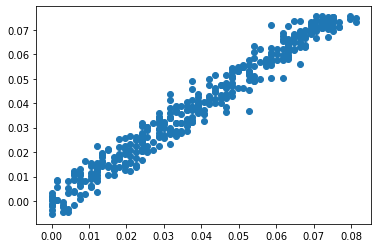

In [27]:
plt.scatter(x_train,y_train)
plt.show()

In [28]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,1)
    def forward(self,X):
        X = self.fc1(X)
        return X

In [29]:
model = Model()
model

Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)

In [30]:
made_up_values = False
if made_up_values:
    x_values = [i for i in range(11)]
    x_train = np.array(x_values, dtype=np.float32)
    x_train = x_train.reshape(-1, 1)
    y_values = [2*i + 1 for i in x_values]
    y_train = np.array(y_values, dtype=np.float32)
    y_train = y_train.reshape(-1, 1)

In [31]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
epochs = 5000
losses = []
losses_item = []
x_train_val = []
y_pred_val = []
y_train_val = []
inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))
inputs = torch.nan_to_num(inputs)
labels = torch.nan_to_num(labels)

for i in range(epochs):
    i += 1
    optimizer.zero_grad()
    y_pred = model(inputs.float())
    loss = criterion(y_pred, labels.float())
    losses_item.append(loss.item())
    loss.backward()
    optimizer.step()
    if (i+1) == epochs:
        x_train_val = inputs
        y_pred_val = y_pred
        y_train_val = labels
    if i%1000 == 0:
        print(f'epochs: {i}  loss: {loss.item():.4f}')

epochs: 1000  loss: 0.0034
epochs: 2000  loss: 0.0001
epochs: 3000  loss: 0.0000
epochs: 4000  loss: 0.0000
epochs: 5000  loss: 0.0000


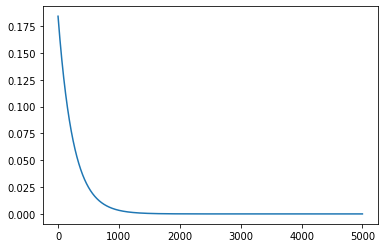

In [32]:
plt.plot(range(epochs),losses_item)
plt.show()

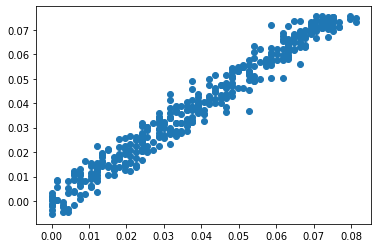

In [33]:
plt.scatter(x_train_val,y_train_val)
plt.show()

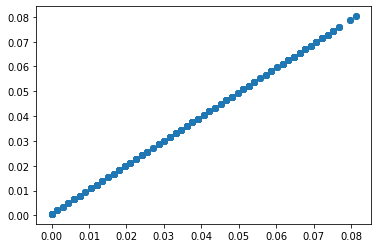

In [34]:
plt.scatter(x_train_val,y_pred_val.detach().numpy())
plt.show()
